The smaller big short - can you predict whether a loan was given?

In [45]:
import time 
start_time = time.time()


In [46]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import plotly.express as px
import numpy as np
import seaborn as sns


In [47]:
Loans_df = pd.read_csv('loan_approval_dataset.csv')
Loans_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [48]:
Labels_df = Loans_df['loan_status']
Features_df = Loans_df.drop(['loan_status'], axis=1)

#Convert Labels to 0 and 1
Labels_df = Labels_df.replace({' Rejected': 0, ' Approved': 1})

#Convert Education to binary similarly 
Features_df['education'] = Features_df['education'].replace({' Not Graduate': 0, ' Graduate': 1})

#Convert Self Employed to binary similarly
Features_df['self_employed'] = Features_df['self_employed'].replace({' No': 0, ' Yes': 1})


#No need for label encoder!

In [49]:
Normalise = StandardScaler()
Features = Normalise.fit_transform(Features_df.values)
Labels = Labels_df.values

#Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

The sigmoid function is 1/(1+exp(-z)) where z = theta transpose*x, this means provided you can find the optimal weights, this is simply a matrix transformation followed by a logical statement
You can download a Pytorch module, but sometimes its better to understand the mathematics behind whats going on as its cooler :), in reality its probably quicker given you dont need to import any modules and numpy is optimised for speed. 

In [50]:
# No need to create a neural network class as this is a simple binary classification problem

Theta = np.linalg.inv(X_train.T@X_train)@X_train.T@Y_train
Z_pred = X_test@Theta
Y_pred = np.round(1/(1+np.exp(-Z_pred))) #Sigmoid function

#Calculate the accuracy
accuracy = []
accuracy = accuracy_score(Y_pred, Y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8583138173302107


<Axes: >

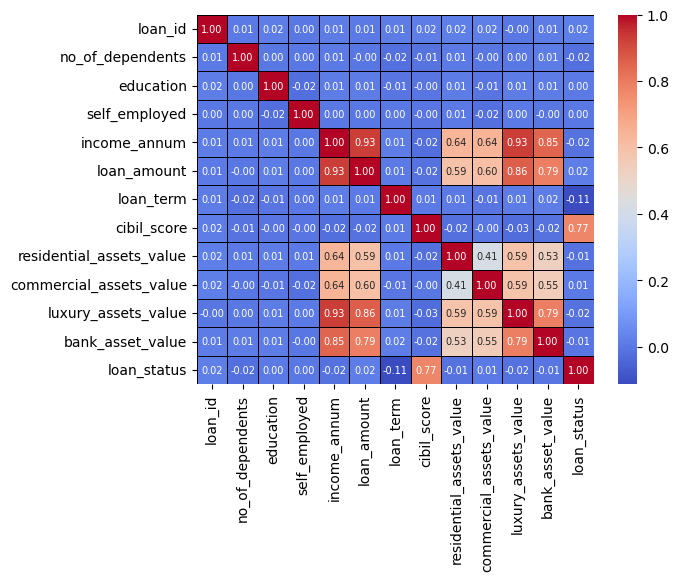

In [51]:
#Correlation matrix 
Loans_df = pd.concat([Features_df, Labels_df], axis=1)
loan_corr = Loans_df.corr()
sns.heatmap(loan_corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', fmt='.2f', annot_kws={'size':7})

Very decent accuracy, but pretty meaningless if you dont know anything about the variables that could have a link. Given we have employed a logistic regression model, it is highly likely that features with a high correlation to label do have some sort of actual relationship. It doesn't imply causation but it does mean that the relationship is probably highly linear. 

This whole project just proved having a better credit score means you'll get a loan...insightful. 

In [52]:
end_time = time.time()
print("Time taken: ", end_time-start_time)

Time taken:  0.9534592628479004


What is interesting however, is that this project proves for supervised learning models that don't involve neural networks, you don't need to import Pytorch/Tensorflow libraries and its all mathematics. It runs faster than a second using just numpy! For linear/logistic regression, provided you understand inverting matrices and exponential functions it is much more efficient to just use that. 